In [1]:
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np


mnist = fetch_openml('mnist_784', parser='auto')

Xall, yall = mnist.data, mnist.target.astype(int)
Xall = Xall / 255.0 # Scale the pixel values to [0, 1]

# Perform PCA on the data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(Xall)


X_pca=np.array(X_pca)
yall=np.array(yall)

print(Xall.shape)
print(X_pca.shape)

X = X_pca[:300,:]
y = yall[:300]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression tree
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = np.round(reg_tree.predict(X_test)).astype(int)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


(70000, 784)
(70000, 3)
Accuracy: 0.50


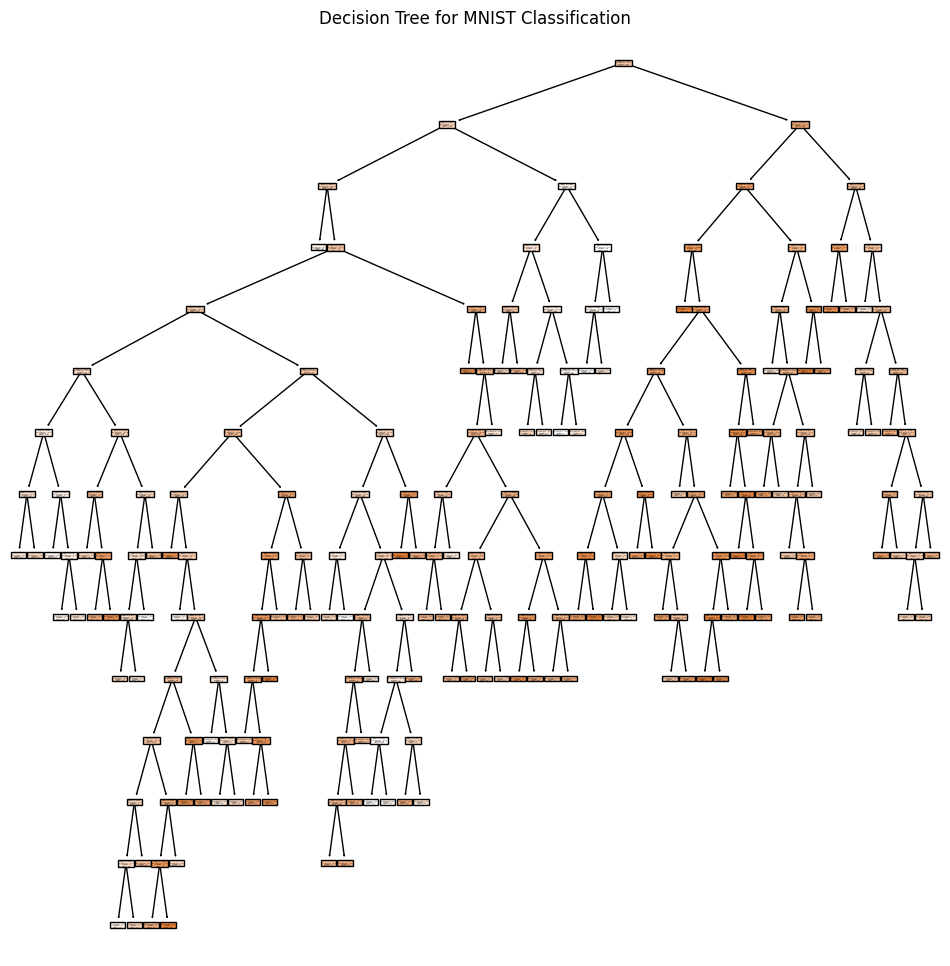

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 12))
plot_tree(reg_tree, feature_names=mnist.feature_names, class_names=mnist.target_names, filled=True)
plt.title("Decision Tree for MNIST Classification")
plt.savefig('class_tree.eps', format='eps', bbox_inches='tight')
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)





Accuracy: 0.5167

Confusion Matrix:
[[7 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 1 0 0 0 0]
 [0 1 0 2 1 0 2 0 0 0]
 [2 0 1 2 0 0 1 0 0 1]
 [0 0 0 0 4 0 0 2 0 1]
 [0 0 1 2 0 1 0 0 1 0]
 [1 0 0 0 1 0 6 0 0 0]
 [0 0 0 0 1 0 0 1 0 1]
 [0 0 0 2 0 2 0 0 1 0]
 [0 0 0 0 0 0 0 2 0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.88      0.88      0.88         8
           2       0.00      0.00      0.00         6
           3       0.25      0.29      0.27         7
           4       0.57      0.57      0.57         7
           5       0.25      0.20      0.22         5
           6       0.67      0.75      0.71         8
           7       0.20      0.33      0.25         3
           8       0.50      0.20      0.29         5
           9       0.40      0.50      0.44         4

    accuracy                           0.52        60
   macro avg       0.44      0.47      0.44        60
weigh

In [11]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784) # flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the MNIST dataset and apply transformations
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize the network and define the loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Train the network
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

# Test the network
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/10], Step [100/938], Loss: 2.2878
Epoch [1/10], Step [200/938], Loss: 2.2526
Epoch [1/10], Step [300/938], Loss: 2.1666
Epoch [1/10], Step [400/938], Loss: 2.0438
Epoch [1/10], Step [500/938], Loss: 1.7669
Epoch [1/10], Step [600/938], Loss: 1.5926
Epoch [1/10], Step [700/938], Loss: 1.3686
Epoch [1/10], Step [800/938], Loss: 1.0840
Epoch [1/10], Step [900/938], Loss: 1.0518
Epoch [2/10], Step [100/938], Loss: 0.6547
Epoch [2/10], Step [200/938], Loss: 0.7337
Epoch [2/10], Step [300/938], Loss: 0.5282
Epoch [2/10], Step [400/938], Loss: 0.6331
Epoch [2/10], Step [500/938], Loss: 0.5613
Epoch [2/10], Step [600/938], Loss: 0.4669
Epoch [2/10], Step [700/938], Loss: 0.6180
Epoch [2/10], Step [800/938], Loss: 0.5675
Epoch [2/10], Step [900/938], Loss: 0.3590
Epoch [3/10], Step [100/938], Loss: 0.3467
Epoch [3/10], Step [200/938], Loss: 0.3664
Epoch [3/10], Step [300/938], Loss: 0.4747
Epoch [3/10], Step [400/938], Loss: 0.3377
Epoch [3/10], Step [500/938], Loss: 0.6237
Epoch [3/10